In [35]:
import subprocess
import pandas as pd
import numpy as np
import csv

In [36]:
LONG_LONG_MAX =  9223372036854775807

#CHANGE FOR DIMS HERE
n = 500
m = 500
m2 = 500

#f =  open("Matrix_out.txt")
mat = np.random.randint(0,1000,size=(n,m))
print(mat)
np.savetxt("matrix1.txt",mat,fmt='%i')

mat2 = np.random.randint(0,1000,size=(m,m2))
print(mat2)
np.savetxt("matrix2.txt",mat2,fmt='%i')

matRes = np.matmul(mat,mat2)
print(matRes)
print(matRes.shape)
np.savetxt("matrixres.txt",matRes,fmt='%i')

[[752 262 238 ... 552 104 118]
 [121 184 108 ... 658 711 784]
 [717 179 546 ...  32 149 937]
 ...
 [651 107 855 ... 557 361  10]
 [661 509 629 ... 635 859 267]
 [ 10  81  17 ... 595 822  73]]
[[882 342 695 ... 807 432 362]
 [782 791 989 ... 428 847 203]
 [ 83 518 224 ... 330 837 555]
 ...
 [ 43 122 325 ... 748 927 406]
 [661 751 981 ...  51 451 566]
 [720 733  27 ... 457 185 243]]
[[125601263 134817178 121980627 ... 127383875 130684480 122984921]
 [120411469 129861071 116788036 ... 125554059 121473751 122350434]
 [118499186 129468308 115070581 ... 125336472 126303511 115699718]
 ...
 [124971454 133845758 120084000 ... 126970241 130648325 127662525]
 [122468767 132858543 116375512 ... 123576631 128045885 124802086]
 [119607254 128288078 118695172 ... 127493045 126834140 120699612]]
(500, 500)


In [37]:
subprocess.call(["gcc", "P1.c", "-o","P1.out", "-pthread"])
subprocess.call(["gcc", "P2.c", "-o","P2.out", "-pthread"])


# subprocess.call("gcc schedulercopy.c")

f1 = open('datap1.csv', 'w')
f2 = open('datap2.csv', 'w')

writer1 = csv.writer(f1)
writer2 = csv.writer(f2)

header1 = ['dim1', 'dim2', 'dim3', 'num_threads', 'time (ns)']
header2 = ['dim1', 'dim2', 'dim3', 'num_threads', 'time (ns)']

writer1.writerow(header1)
writer2.writerow(header2)

f1.close()
f2.close()

In [38]:

#FOR THREADS CHANGE HERE
for i in range(1, 100):
    p1 = "./P1.out "+str(n)+" "+str(m)+" "+str(m2)+" "+"matrix1.txt matrix2.txt out.txt "+ str(i) +" 1"
    tmp=subprocess.call(p1.split()) 
    print("printing result")
    #print(tmp)
    p2 = "./P2.out "+str(n)+" "+str(m)+" "+str(m2)+" "+"matrix1.txt matrix2.txt out.txt 1 "+ str(i)
    tmp=subprocess.call(p2.split()) 
    print("printing result")
    #print(tmp)
# #dataP1.txt

P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
p

Text(0.5, 1.0, 'P1 execution time vs No of threads for dim 500 500 500')

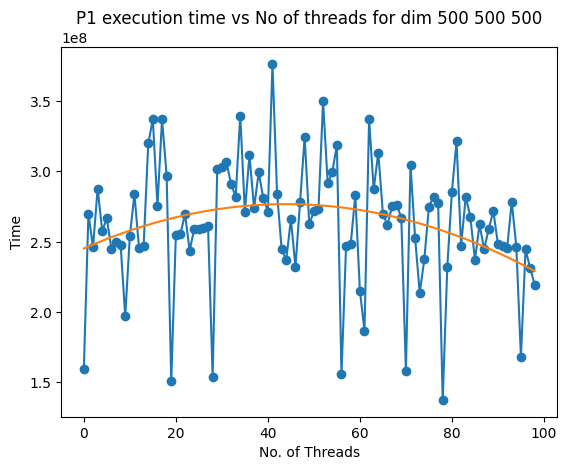

In [57]:
df = pd.read_csv("datap1.csv")

#df = df.groupby('num_threads').min('time(ns)')
#print(df.head)

import matplotlib.pyplot as plt

ax = plt.axes()
ax.scatter(df.index,df['time (ns)'])
ax.plot(df.index,df['time (ns)'])

z = np.polyfit(df.index, df['time (ns)'], 2)
p = np.poly1d(z)
ax.plot(df.index, p(df.index))

ax.set_xlabel('No. of Threads')
ax.set_ylabel('Time')
ax.set_title("P1 execution time vs No of threads for dim "+str(n)+ " "+str(m) +" "+str(m2))

Text(0.5, 1.0, 'P1 execution time vs No of threads for dim 500 500 500')

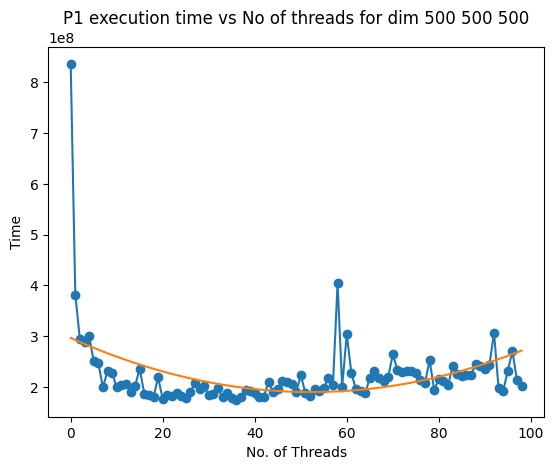

In [56]:
df = pd.read_csv("datap2.csv")

#df = df.groupby('num_threads').min('time(ns)')
#print(df.head)

import matplotlib.pyplot as plt
ax = plt.axes()
ax.scatter(df.index,df['time (ns)'])
ax.plot(df.index,df['time (ns)'])

z = np.polyfit(df.index, df['time (ns)'], 2)
p = np.poly1d(z)
ax.plot(df.index, p(df.index))

ax.set_xlabel('No. of Threads')
ax.set_ylabel('Time')
ax.set_title("P1 execution time vs No of threads for dim "+str(n)+ " "+str(m) +" "+str(m2))